In [82]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.probability import FreqDist
from nltk.corpus import stopwords


# Coursera analysis

In [83]:
df_coursera_courses = pd.read_csv('Datasets/Coursera_courses.csv')

In [84]:
df_coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [85]:
df_coursera_courses.shape

(623, 4)

In [86]:
df_coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [87]:
df_coursera_courses.duplicated().sum()

0

# Check amounts of institutions

In [88]:
df_coursera_courses['institution'].value_counts()

University of Pennsylvania       43
University of Michigan           31
Duke University                  24
Google Cloud                     22
IBM                              18
                                 ..
EDHEC Business School             1
INSEAD                            1
Google - Spectrum Sharing         1
New York Institute of Finance     1
UCL School of Management          1
Name: institution, Length: 134, dtype: int64

# Create a dataframe that contains the institution an the amount of repeaeted time 

In [89]:
value_counts = df_coursera_courses['institution'].value_counts(dropna=True, sort=True)
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['institution', 'counts']

In [90]:
df_value_counts_reset

,institution,counts
0,University of Pennsylvania,43
1,University of Michigan,31
2,Duke University,24
3,Google Cloud,22
4,IBM,18
...,...,...
129,EDHEC Business School,1
130,INSEAD,1
131,Google - Spectrum Sharing,1
132,New York Institute of Finance,1


# Check courses distribution for institution

The media amount of intitution offers less than 10 courses

Text(0, 0.5, 'Amount of courses')

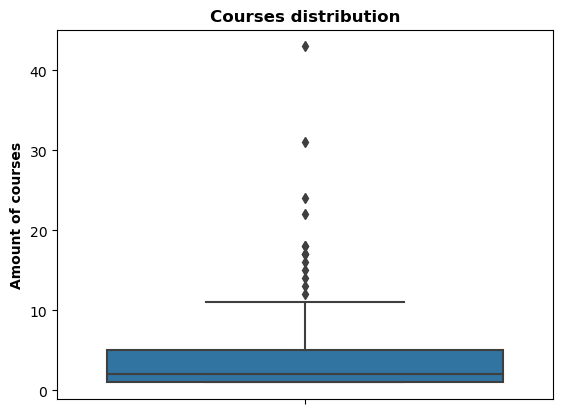

In [91]:
sns.boxplot(data=df_value_counts_reset, y='counts')
plt.title('Courses distribution', weight='bold')
plt.ylabel('Amount of courses', weight='bold')

# Courses distribution

Text(0.5, 1.0, 'Courses distribution')

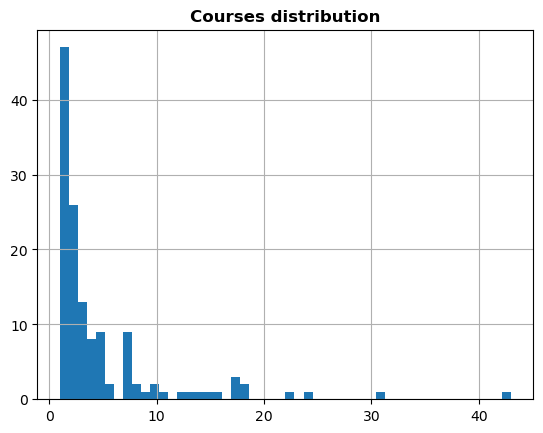

In [92]:
df_value_counts_reset.hist(bins=50)
plt.show
plt.title('Courses distribution', weight='bold')

# Top 10 popular institution

Text(0, 0.5, 'Institution')

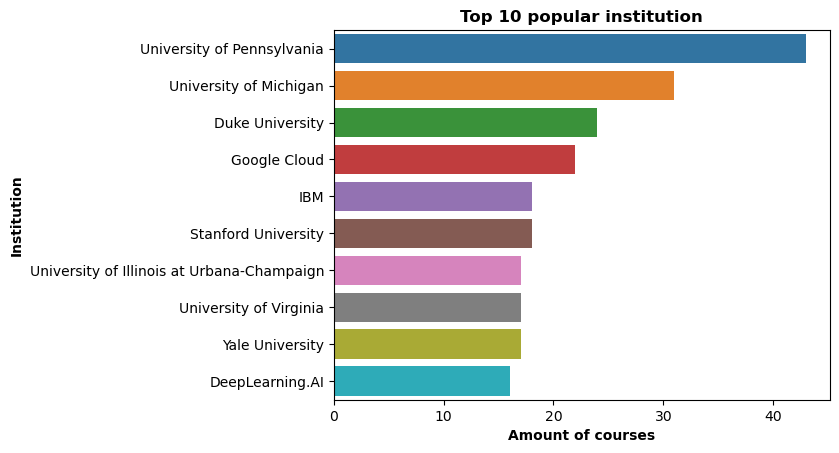

In [93]:
sns.barplot(data=df_value_counts_reset.head(10), y='institution', x='counts')
plt.title('Top 10 popular institution', weight='bold')
plt.xlabel('Amount of courses', weight='bold')
plt.ylabel('Institution', weight='bold')

# Get courses rating from review dataset 

In [232]:
df_coursera_reviews = pd.read_csv('Datasets/Coursera_reviews.csv')

In [230]:
df_coursera_reviews.duplicated().sum()

0

In [96]:
df_coursera_reviews.drop_duplicates(inplace=True)

In [97]:
df_coursera_courses = df_coursera_courses.join(df_coursera_reviews.groupby('course_id').mean().round(1), on='course_id', how='left')

In [98]:
df_coursera_courses.head()

,name,institution,course_url,course_id,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,4.7
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada,4.8
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being,4.9
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals,4.8
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training,4.8


In [99]:
df_coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         623 non-null    object 
 1   institution  623 non-null    object 
 2   course_url   623 non-null    object 
 3   course_id    623 non-null    object 
 4   rating       604 non-null    float64
dtypes: float64(1), object(4)
memory usage: 24.5+ KB


# Create a new dataframe with rating

In [100]:
df_coursera_courses.to_csv('Datasets/coursera.csv', index=False)

In [101]:
df_coursera_courses = df_coursera_courses.sort_values(by='rating', ascending=False)

In [102]:
df_coursera_courses.head()

,name,institution,course_url,course_id,rating
361,El Abogado del Futuro: Legaltech y la Transfor...,Universidad Austral,https://www.coursera.org/learn/legaltech,legaltech,5.0
106,Entreprise et changement climatique,ESSEC Business School,https://www.coursera.org/learn/entreprise-chan...,entreprise-changement-climatique,5.0
298,Bugs 101: Insect-Human Interactions,University of Alberta,https://www.coursera.org/learn/bugs-101,bugs-101,5.0
500,Building Modern Python Applications on AWS,Amazon Web Services,https://www.coursera.org/learn/building-modern...,building-modern-python-applications-on-aws,5.0
494,Build a Modern Computer from First Principles:...,Hebrew University of Jerusalem,https://www.coursera.org/learn/nand2tetris2,nand2tetris2,5.0


In [103]:
df_coursera_courses.describe()

,rating
count,604.000000
mean,4.619868
std,0.395626
min,1.000000
25%,4.600000
50%,4.700000
75%,4.800000
max,5.000000


# Check rating distribution

The media rating is between 4.7 and 4.5. This means that people are happy with courses.

Text(0, 0.5, 'Rating')

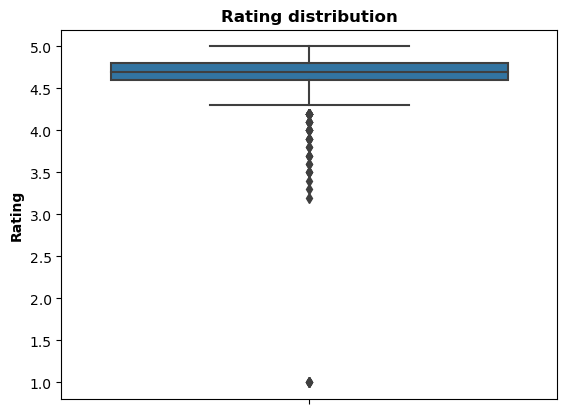

In [104]:
sns.boxplot(data=df_coursera_courses, y='rating')
plt.title('Rating distribution', weight='bold')
plt.ylabel('Rating', weight='bold')

# Rating distribution

Text(0.5, 1.0, 'Rating histogram')

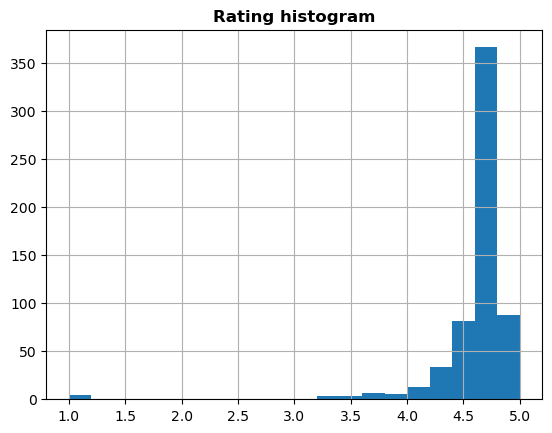

In [105]:
df_coursera_courses.hist(bins=20)
plt.show
plt.title('Rating histogram', weight='bold')

# Top 20 institution based on rating

In [106]:
df_aux = df_coursera_courses.groupby('institution').mean().round(1)

In [107]:
df_aux.sort_values(by='rating', ascending=False, inplace=True)

In [108]:
df_aux.reset_index(inplace=True)

Text(0, 0.5, 'Institution')

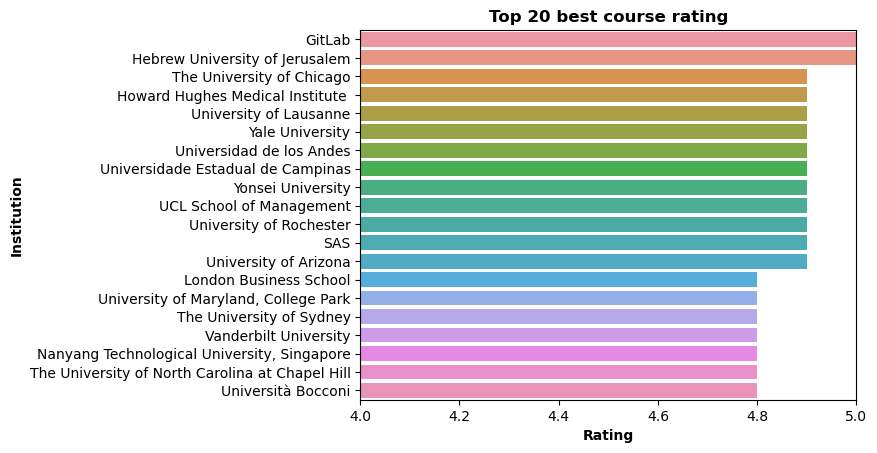

In [109]:
sns.barplot(data=df_aux.head(20), y='institution', x='rating')
plt.xlim(4, 5)
plt.title('Top 20 best course rating', weight='bold')
plt.xlabel('Rating', weight='bold')
plt.ylabel('Institution', weight='bold')

# Draw a wordcloud for course name

In [110]:
title = df_coursera_courses['name'].to_list()
title_word = [word.split(' ') for word in title]
title_word = [word for word_list in title_word for word in word_list]

In [111]:
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())

In [112]:
nltk.download("stopwords")

stopwords_a=set(stopwords.words('english'))
token1 = [word for word in token0 if word not in stopwords_a]

[nltk_data] Downloading package stopwords to /home/fede/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Get the frequency of each word in the title

In [113]:
fdist = FreqDist(token1)
fdist

FreqDist({'introduction': 89, 'data': 48, 'python': 27, 'management': 26, 'fundamentals': 26, 'science': 21, 'learning': 21, 'health': 18, 'business': 17, 'international': 17, ...})

## Create a new dataframe to store the word and frequency

In [114]:
df_title_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_title_new.head()

,Word,Frequency
0,abogado,1
1,del,3
2,futuro:,1
3,legaltech,1
4,transformación,1


In [115]:
df_title_new.sort_values('Frequency',ascending=False, inplace = True)
df_title_new.reset_index(drop = True, inplace=True)

## Apply Stemming

In [116]:
stemmer = PorterStemmer()

In [117]:
title_list=[]
for tit in df_title_new['Word']:
   
    # Tokenized to separate words
    tit=nltk.word_tokenize(tit)
        
    # Find the word root
    tit=[stemmer.stem(word) for word in tit]
    # Union to the title again
    tit=" ".join(tit)
    
    # list with root word of the title
    title_list.append(tit)

In [118]:
df_title_new['word_stem'] = title_list

In [119]:
df_title_new

,Word,Frequency,word_stem
0,introduction,89,introduct
1,data,48,data
2,python,27,python
3,fundamentals,26,fundament
4,management,26,manag
...,...,...,...
1221,rédaction,1,rédaction
1222,contrats,1,contrat
1223,organizaciones,1,organizacion
1224,efectivas,1,efectiva


## Draw stemming title word

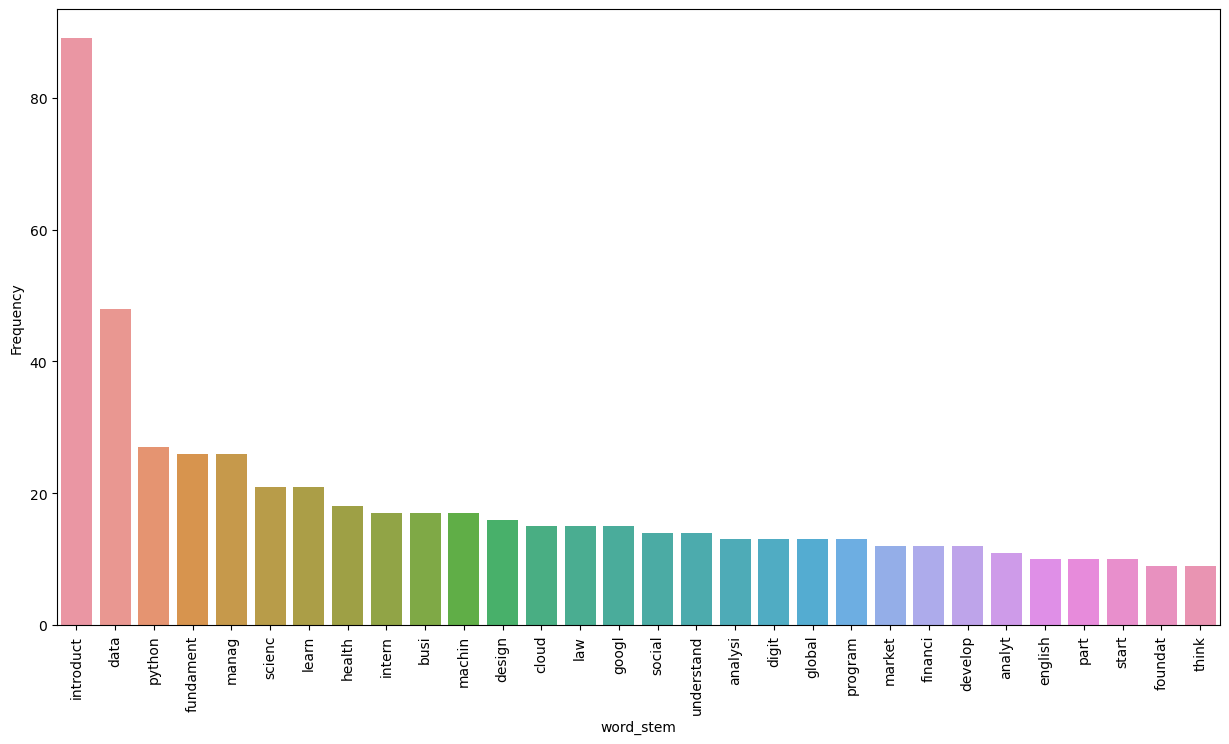

In [120]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].word_stem, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

## Load an image to draw the wordcloud

In [121]:
from PIL import Image
mask = np.array(Image.open(r'_src/assets/coursera_logo.png'))

# Draw the wordcloud

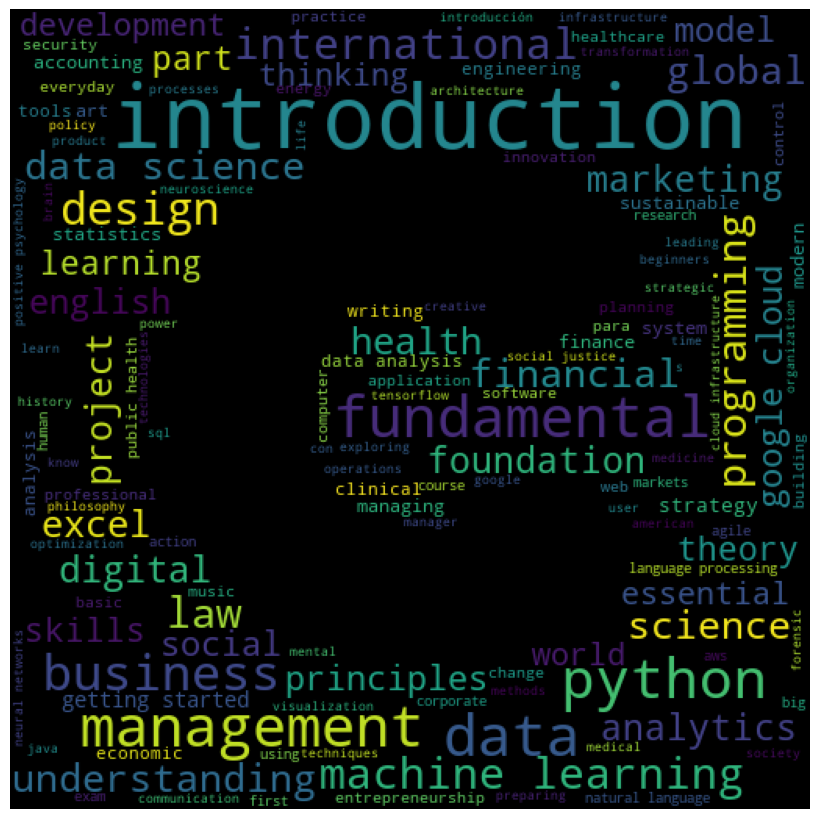

In [122]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(token1)

wordcloud = WordCloud(mask = mask, background_color="black", min_font_size=8, width = mask.shape[1],
               height = mask.shape[0]).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Read Coursera Reviews file

In [123]:
df_coursera_reviews = pd.read_csv('Datasets/Coursera_reviews.csv')

In [124]:
df_coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [125]:
df_coursera_reviews.shape

(1454711, 5)

In [126]:
df_coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [127]:
df_coursera_reviews.duplicated().sum()

934764

In [128]:
df_coursera_reviews.drop_duplicates(inplace=True)

# Check amount of reviews by course

In [129]:
df_coursera_reviews['course_id'].value_counts()

python                                                       15226
machine-learning                                             12677
neural-networks-deep-learning                                12292
technical-support-fundamentals                               12055
learning-how-to-learn                                        11871
                                                             ...  
remote-team-management                                           5
social-work-practice-advocating-social-justice-and-change        5
the-business-of-product-management-one                           5
entreprise-changement-climatique                                 2
building-modern-python-applications-on-aws                       1
Name: course_id, Length: 604, dtype: int64

# Create a new dataframe with amount of reviews per courses id 

In [130]:
value_counts = df_coursera_reviews['course_id'].value_counts(dropna=True, sort=True)

In [131]:
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['technologies', 'counts']

In [132]:
df_value_counts_reset.head()

,technologies,counts
0,python,15226
1,machine-learning,12677
2,neural-networks-deep-learning,12292
3,technical-support-fundamentals,12055
4,learning-how-to-learn,11871


In [133]:
df_value_counts_reset.shape

(604, 2)

# Draw the top 10 popular technologies 

Text(0, 0.5, 'Technologies')

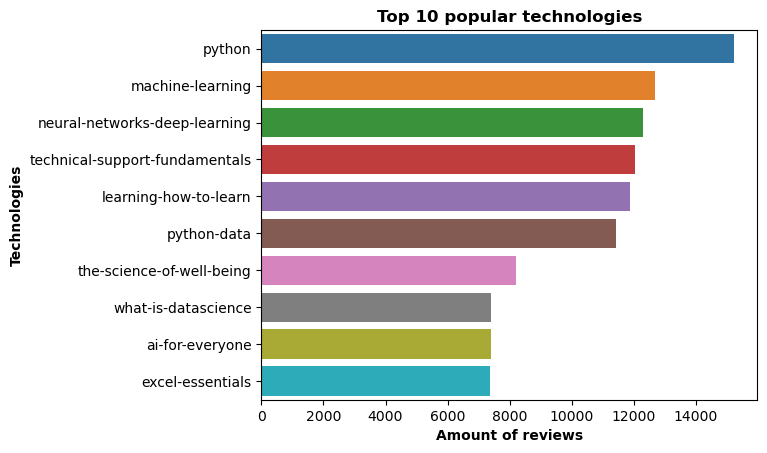

In [134]:
sns.barplot(data=df_value_counts_reset.head(10), y='technologies', x='counts')
plt.title('Top 10 popular technologies', weight='bold')
plt.xlabel('Amount of reviews', weight='bold')
plt.ylabel('Technologies', weight='bold')

# Edx Analysis

In [135]:
df_edx = pd.read_csv('Datasets/edx_courses.csv')

In [136]:
df_edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [137]:
df_edx.shape

(975, 16)

In [138]:
df_edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

# Check for duplicated values

In [139]:
df_edx.duplicated().sum()

1

# Drop duplicated

In [140]:
df_edx.drop_duplicates(inplace=True)

# Create a numeric price column 

In [141]:
df_edx['price in $'] = df_edx['price'].apply(lambda x: re.findall(r'[$]\d+', x)[0].replace('$', ''))

In [142]:
df_edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url,price in $
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online,49
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...,49
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...,90
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge,199
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...,249


# Check NaN values in columns

In [143]:
df_edx['n_enrolled'].isnull().values.sum()

120

In [144]:
df_edx['price in $'].isnull().values.sum()

0

In [145]:
df_edx['n_enrolled'].fillna(0, inplace=True)

In [146]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].apply(lambda x: str(x).replace(',', ''))

In [147]:
df_edx['n_enrolled'] = df_edx['n_enrolled'].astype(int)

In [148]:
df_edx['price in $'] = df_edx['price in $'].astype(int)

In [149]:
df_aux = df_edx.sort_values(by='n_enrolled', ascending=False)

# Draw top 10 popular courses and prices

It can see that most pupalar courses are not the cheapest one

Text(0, 0.5, 'Title')

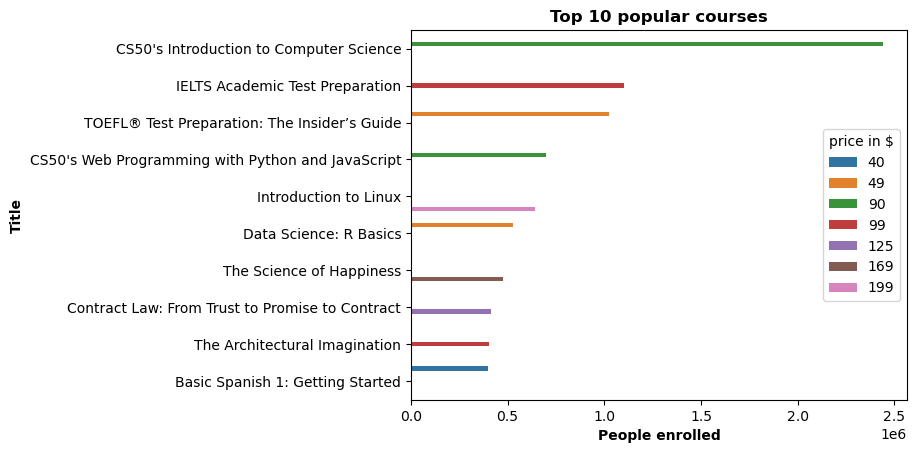

In [150]:
sns.barplot(data=df_aux.head(10), y='title', x='n_enrolled', hue='price in $')
plt.title('Top 10 popular courses', weight='bold')
plt.xlabel('People enrolled', weight='bold')
plt.ylabel('Title', weight='bold')

# Check different courses languages

In [151]:
df_aux['language'].value_counts()

English          776
Español          176
Français           7
Italiano           4
中文                 4
Português          4
日本語                1
Deutsch            1
اللغة العربية      1
Name: language, dtype: int64

# Draw top 10 popular courses with language

The top 10 courses are in english

Text(0, 0.5, 'Title')

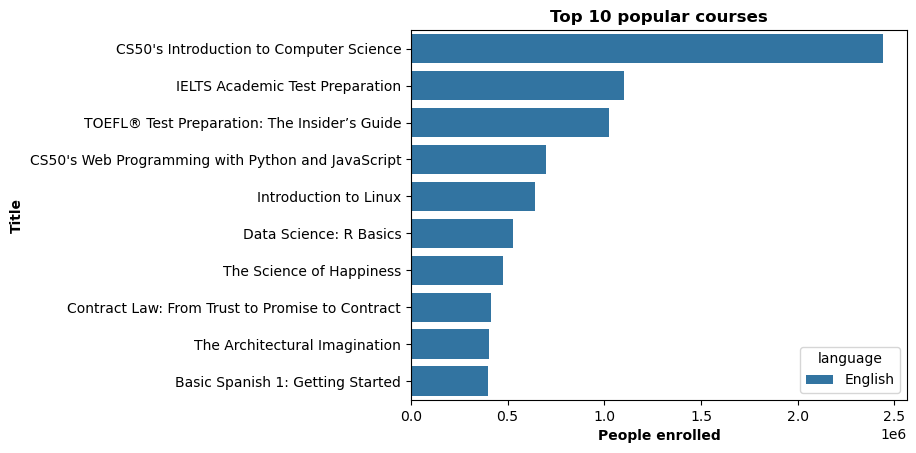

In [152]:
sns.barplot(data=df_aux.head(10), y='title', x='n_enrolled', hue='language')
plt.title('Top 10 popular courses', weight='bold')
plt.xlabel('People enrolled', weight='bold')
plt.ylabel('Title', weight='bold')

# Draw top 10 popular courses with level

Text(0, 0.5, 'Title')

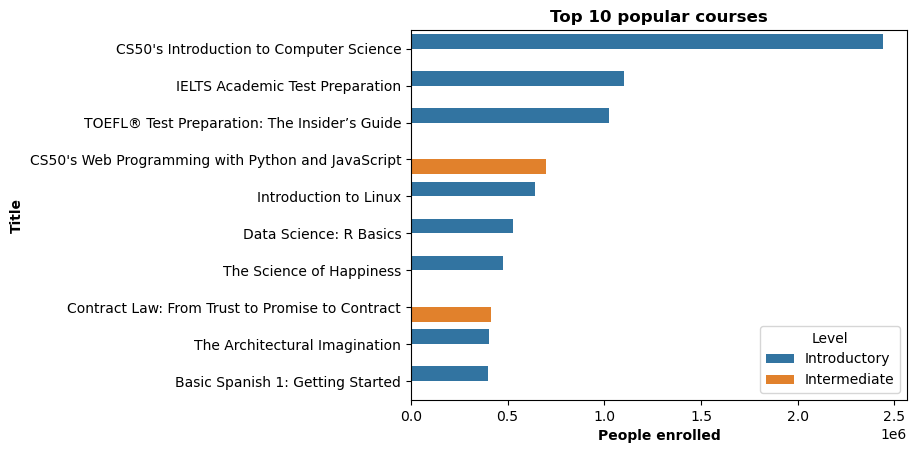

In [153]:
sns.barplot(data=df_aux.head(10), y='title', x='n_enrolled', hue='Level')
plt.title('Top 10 popular courses', weight='bold')
plt.xlabel('People enrolled', weight='bold')
plt.ylabel('Title', weight='bold')

# Type of subject consumes by users

Here it can check that teh most popular courses subject is computer science

In [154]:
df_edx_aux = df_edx['subject'].value_counts(ascending=False)

Text(0, 0.5, 'Subject')

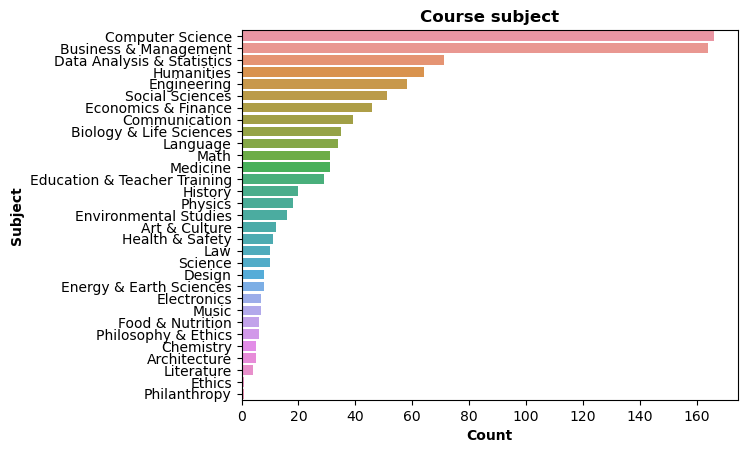

In [155]:
sns.countplot(data=df_edx, y='subject', order=df_edx['subject'].value_counts().index)
plt.title('Course subject', weight='bold')
plt.xlabel('Count', weight='bold')
plt.ylabel('Subject', weight='bold')

## Create a word cloud with the title

In [156]:
title = df_edx['title'].to_list()

In [157]:
title_word = [word.split(' ') for word in title]
title_word = [word for word_list in title_word for word in word_list]
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())
stopwords_a=set(stopwords.words('english'))
token1 = [word for word in token0 if word not in stopwords_a]

## Get the frequency of each word in the title

In [158]:
fdist = FreqDist(token1)
fdist

FreqDist({'introduction': 71, 'data': 55, 'introducción': 41, 'management': 37, 'science': 30, 'business': 28, 'para': 28, 'learning': 26, 'fundamentals': 25, 'part': 23, ...})

## Create a new dataframe to store the word and frequency

In [159]:
df_title_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_title_new.head()

,Word,Frequency
0,learn,1
1,online,5
2,programming,17
3,everybody,1
4,(getting,1


In [160]:
df_title_new.sort_values('Frequency',ascending=False, inplace = True)
df_title_new.reset_index(drop = True, inplace=True)

## Apply Stemming

In [161]:
title_list=[]
for tit in df_title_new['Word']:
   
    # Tokenized to separate words
    tit=nltk.word_tokenize(tit)
        
    # Find the word root
    tit=[stemmer.stem(word) for word in tit]
    # Union to the title again
    tit=" ".join(tit)
    
    # list with root word of the title
    title_list.append(tit)

In [162]:
df_title_new['word_stem'] = title_list

In [163]:
df_title_new

,Word,Frequency,word_stem
0,introduction,71,introduct
1,data,55,data
2,introducción,41,introducción
3,management,37,manag
4,science,30,scienc
...,...,...,...
1954,person-centered,1,person-cent
1955,counseling:,1,counsel :
1956,well-being,1,well-b
1957,existential,1,existenti


## Draw stemming title word

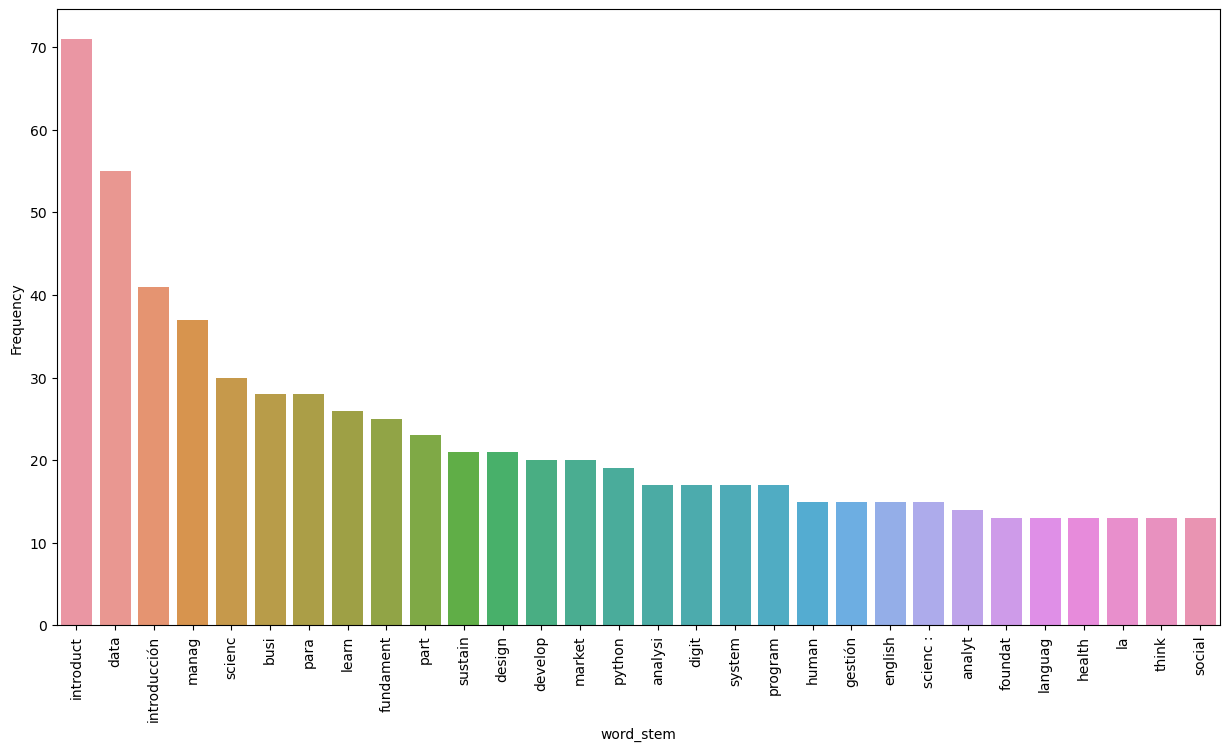

In [164]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].word_stem, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

# Draw the wordcloud

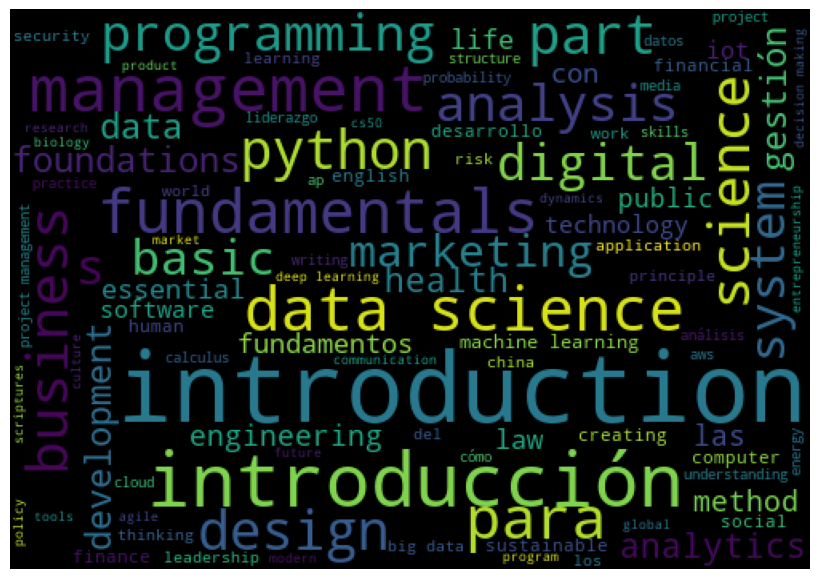

In [165]:
text = " ".join(token1)

wordcloud = WordCloud(background_color="black", min_font_size=8, width=500,
                      height=350).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Udemy Analysis

For this case it has worked with the `udemy.csv`  file. This file has been created with the `udemy_courses.csv` file and it has made a web scraping using the URL to get the rating and language

In [166]:
df_udemy = pd.read_csv('Datasets/udemy.csv')

In [167]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8


In [168]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
 12  language             3678 non-null   object 
 13  rating               3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 377.3+ KB


# Check duplicated values

In [169]:
df_udemy.duplicated().sum()

6

# Drop duplicated

In [170]:
df_udemy.drop_duplicates(inplace=True)

In [171]:
df_udemy = df_udemy[['course_title', 'is_paid', 'price', 'num_subscribers', 'level',
                    'content_duration', 'published_timestamp', 'subject', 'language', 'rating']]

# Extract year from column

In [172]:
df_udemy['year'] = pd.to_datetime(df_udemy['published_timestamp'])

In [173]:
df_udemy['year'] = df_udemy['year'].dt.year

In [174]:
df_udemy.head()

,course_title,is_paid,price,num_subscribers,level,content_duration,published_timestamp,subject,language,rating,year
0,Ultimate Investment Banking Course,True,200,2147,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5,2017
2,Financial Modeling for Business Analysts and C...,True,45,2174,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2,2016
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5,2017
4,How To Maximize Your Profits Trading Options,True,200,1276,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8,2016


# Check null values in `price` column 

In [175]:
df_udemy['price'].isnull().values.sum()

0

In [176]:
df_aux = df_udemy.copy()

In [177]:
df_aux['subscriber X 1000'] = df_aux['num_subscribers'].apply(lambda x: x/1000 )

# Draw top 10 popular courses and prices

The most popular course is free

In [178]:
df_aux = df_aux.sort_values(by='subscriber X 1000', ascending=False)

Text(0, 0.5, 'Title')

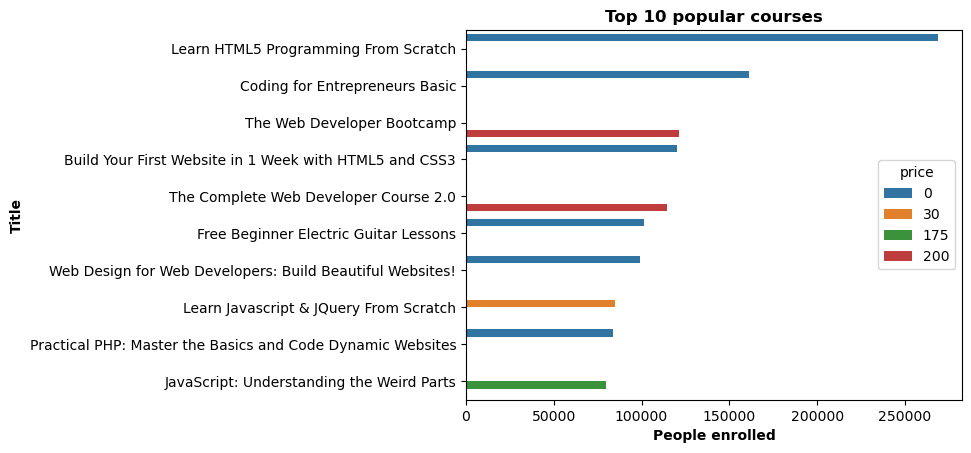

In [179]:
sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='price')
plt.title('Top 10 popular courses', weight='bold')
plt.xlabel('People enrolled', weight='bold')
plt.ylabel('Title', weight='bold')

# Draw top 10 popular courses with language

Text(0, 0.5, 'Title')

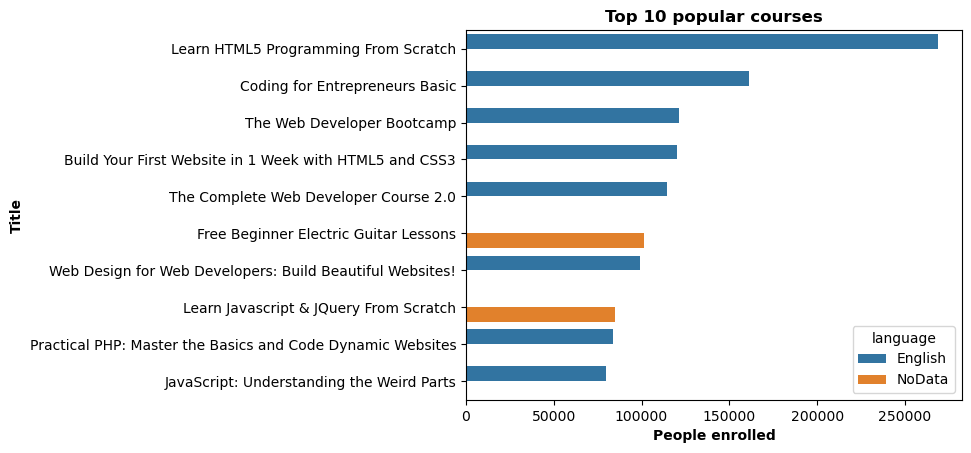

In [180]:
sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='language')
plt.title('Top 10 popular courses', weight='bold')
plt.xlabel('People enrolled', weight='bold')
plt.ylabel('Title', weight='bold')

# Draw top 10 popular courses with level

Text(0, 0.5, 'Title')

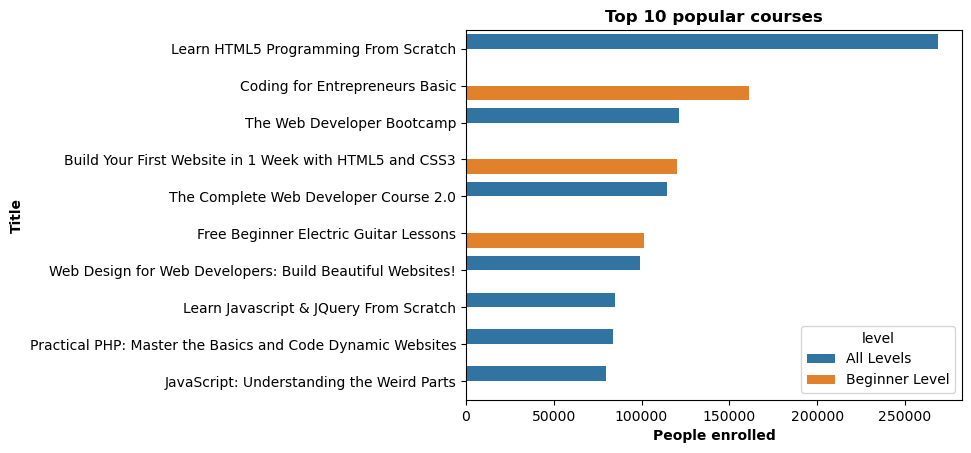

In [181]:
sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='level')
plt.title('Top 10 popular courses', weight='bold')
plt.xlabel('People enrolled', weight='bold')
plt.ylabel('Title', weight='bold')

# Draw top 10 popular courses with rating

Text(0, 0.5, 'Title')

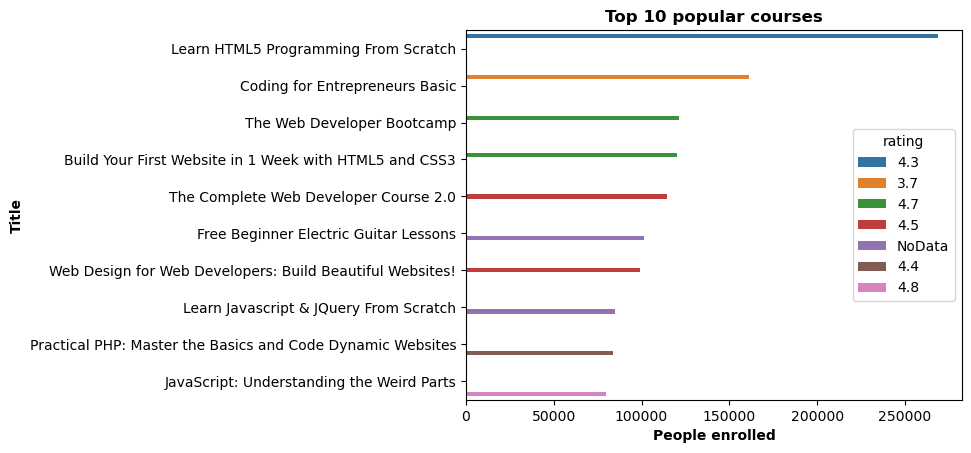

In [182]:
sns.barplot(data=df_aux.head(10), y='course_title', x='num_subscribers', hue='rating')
plt.title('Top 10 popular courses', weight='bold')
plt.xlabel('People enrolled', weight='bold')
plt.ylabel('Title', weight='bold')

# Type of subject consumes by users

Text(0, 0.5, 'Subject')

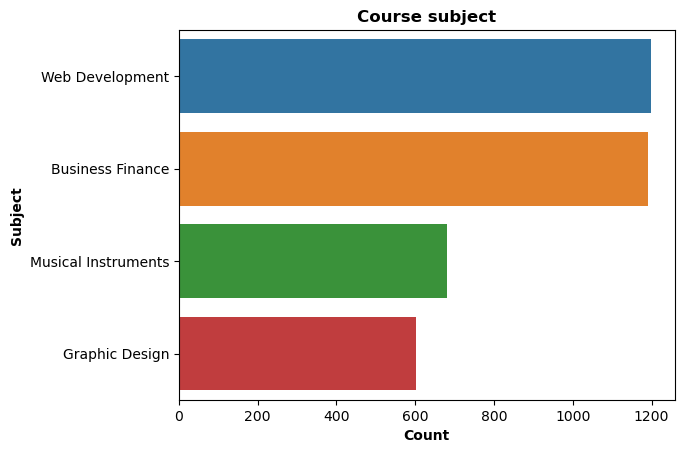

In [183]:
sns.countplot(data=df_udemy, y='subject', order=df_udemy['subject'].value_counts().index)
plt.title('Course subject', weight='bold')
plt.xlabel('Count', weight='bold')
plt.ylabel('Subject', weight='bold')

# Amount of courses per year

Text(0, 0.5, 'Year')

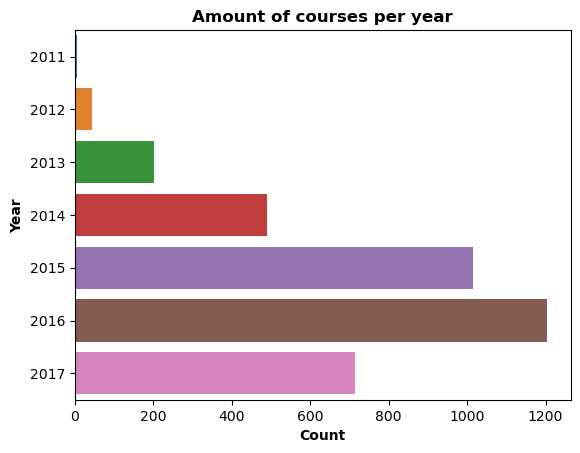

In [184]:
sns.countplot(data=df_udemy, y='year')
plt.title('Amount of courses per year', weight='bold')
plt.xlabel('Count', weight='bold')
plt.ylabel('Year', weight='bold')

## Create a word cloud with the title

In [185]:
title = df_udemy['course_title'].to_list()
title_word = [word.split(' ') for word in title]
title_word = [word for word_list in title_word for word in word_list]
token0 = []
for word in title_word:
  if len(word) >= 3:
    token0.append(word.lower())
stopwords_a=set(stopwords.words('english'))
token1 = [word for word in token0 if word not in stopwords_a]

## Get the frequency of each word in the title

In [186]:
fdist = FreqDist(token1)
fdist

FreqDist({'learn': 506, 'trading': 285, 'beginners': 248, 'web': 221, 'course': 203, 'guitar': 203, 'design': 187, 'complete': 186, 'piano': 176, 'build': 170, ...})

## Create a new dataframe to store the word and frequency

In [187]:
df_title_new = pd.DataFrame(list(fdist.items()), columns = ["Word","Frequency"])
df_title_new.head()

,Word,Frequency
0,ultimate,39
1,investment,22
2,banking,10
3,course,203
4,complete,186


In [188]:
df_title_new.sort_values('Frequency',ascending=False, inplace = True)
df_title_new.reset_index(drop = True, inplace=True)

## Apply Stemming

In [189]:
title_list=[]
for tit in df_title_new['Word']:
   
    # Tokenized to separate words
    tit=nltk.word_tokenize(tit)
        
    # Find the word root
    tit=[stemmer.stem(word) for word in tit]
    # Union to the title again
    tit=" ".join(tit)
    
    # list with root word of the title
    title_list.append(tit)

In [190]:
df_title_new['word_stem'] = title_list

In [191]:
df_title_new

,Word,Frequency,word_stem
0,learn,506,learn
1,trading,285,trade
2,beginners,248,beginn
3,web,221,web
4,guitar,203,guitar
...,...,...,...
4352,hipster,1,hipster
4353,businessman,1,businessman
4354,pro+,1,pro+
4355,fonts,1,font


## Draw stemming title word

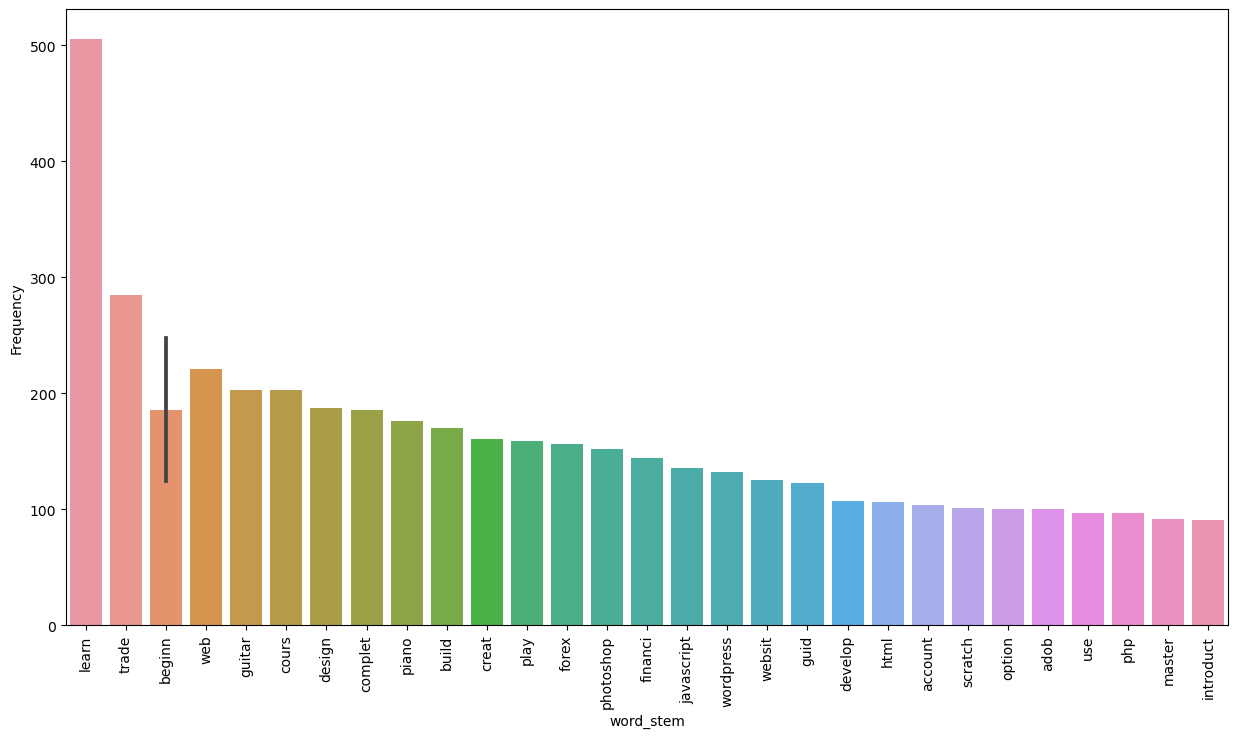

In [192]:
plt.figure(figsize = (15,8))
plot = sns.barplot(x  = df_title_new.iloc[:30].word_stem, y = df_title_new.iloc[:30].Frequency)
for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

# Draw the wordcloud

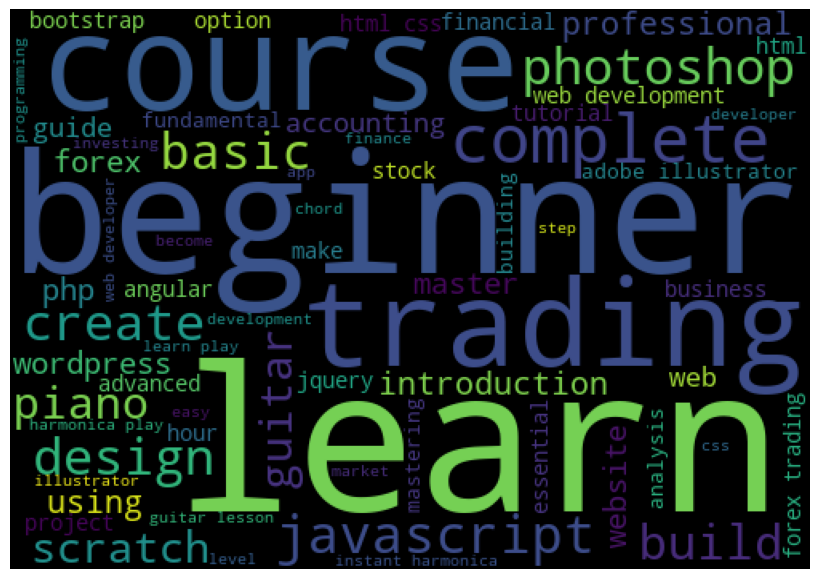

In [193]:
text = " ".join(token1)

wordcloud = WordCloud(background_color="black", min_font_size=8, width=500,
                      height=350).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Create a dimension table

In [194]:
df_udemy = pd.read_csv('Datasets/udemy.csv')

In [195]:
df_udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,English,3.6
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,English,4.5
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,English,4.2
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,English,4.5
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,English,4.8


# Detect problems in titles

This problem has been detected when it has used my [script](https://github.com/fedepacher/CreateMySQLwithCSV) to create a SQL file to import to Power Bi.

In [196]:
df_udemy[df_udemy['course_id'] == 52118]['course_title']

291    Multiply your returns using 'Value Investing",...
Name: course_title, dtype: object

In [197]:
df_udemy.loc[df_udemy['course_id'] == 52118, 'course_title'] = 'Multiply your returns using Value Investing'

In [198]:
df_udemy[df_udemy['course_id'] == 149716]['course_title']

1875    Learn to Play Fernando Sor's 'Study in B minor...
Name: course_title, dtype: object

In [199]:
df_udemy.loc[df_udemy['course_id'] == 149716, 'course_title'] = 'Learn to Play Fernando Sor Study in B minor'

In [200]:
df_udemy[df_udemy['course_id'] == 1052180]['course_title']

2036    How to play 'Electric Guitar",https://www.udem...
Name: course_title, dtype: object

In [201]:
df_udemy.loc[df_udemy['course_id'] == 1052180, 'course_title'] = 'How to play Electric Guitar'

In [202]:
df_udemy[df_udemy['course_id'] == 151027]['course_title']

2169    Introduction to Guitar 'A Course for Beginners...
Name: course_title, dtype: object

In [203]:
df_udemy.loc[df_udemy['course_id'] == 151027, 'course_title'] = 'Introduction to Guitar A Course for Beginners'

In [204]:
df_udemy[df_udemy['course_id'] == 286898]['course_title']

2186    Aprende a tocar el Acordeón 'de oído y con téc...
Name: course_title, dtype: object

In [205]:
df_udemy.loc[df_udemy['course_id'] == 286898, 'course_title'] = 'Aprende a tocar el Acordeón de oído y con técnica'

# Drop dupliocated

In [206]:
df_udemy.duplicated().sum()

6

In [207]:
df_udemy.drop_duplicates(inplace=True)

In [208]:
def convetFunction(column):
    """Function to convert cualitative column into cuantitative and create a cvs file

    Args:
        column (str): Column to be converted
    """
    object_list = df_udemy[column].unique()
    object_dict = {key:index for index, key in enumerate(object_list)}
    df = pd.DataFrame(object_list)
    df.rename(columns={0:column}, inplace=True)
    df.index.rename(name=f'{column}_id', inplace=True)
    df_udemy.replace({column: object_dict}, inplace=True)
    df_udemy.rename(columns = {'column': f'{column}_id'}, inplace=True)
    df.to_csv(f'NewDatasets/{column}.csv')

# Create a dataframe for courses titles

In [209]:
df_courses = df_udemy[['course_id', 'course_title']]

In [210]:
df_courses.set_index('course_id')

,course_title
course_id,
1070968,Ultimate Investment Banking Course
1113822,Complete GST Course & Certification - Grow You...
1006314,Financial Modeling for Business Analysts and C...
1210588,Beginner to Pro - Financial Analysis in Excel ...
1011058,How To Maximize Your Profits Trading Options
...,...
775618,Learn jQuery from Scratch - Master of JavaScri...
1088178,How To Design A WordPress Website With No Codi...
635248,Learn and Build using Polymer


In [211]:
df_courses['course_title'] = df_courses['course_title'].str.replace(',', ';')

/tmp/ipykernel_37017/2518098838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_courses['course_title'] = df_courses['course_title'].str.replace(',', ';')


In [212]:
df_courses.to_csv('NewDatasets/courses.csv', index=False)

In [213]:
df_udemy.drop(columns='course_title', axis=1, inplace=True)

In [214]:
df_udemy.drop(columns='url', axis=1, inplace=True)

# Create separeted csv file in order to remove cualitative column from dimension dataframe

In [215]:
convetFunction('level')
convetFunction('is_paid')
convetFunction('subject')
convetFunction('language')

# Replace values to convert to float

In [216]:
df_udemy.loc[df_udemy['rating'] == 'NoData', 'rating'] = '0'

In [217]:
df_udemy['rating'] = df_udemy['rating'].str.replace(',', '.')

In [218]:
df_udemy['rating'] = df_udemy['rating'].astype(float)

In [219]:
df_udemy['rating'].head(10)

0    3.6
1    4.5
2    4.2
3    4.5
4    4.8
5    0.0
6    4.5
7    4.8
8    0.0
9    3.7
Name: rating, dtype: float64

# Convert column to Date column

In [220]:
df_udemy['published_timestamp'] = pd.to_datetime(df_udemy['published_timestamp']).dt.date

In [221]:
df_udemy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3672 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   is_paid              3672 non-null   int64  
 2   price                3672 non-null   int64  
 3   num_subscribers      3672 non-null   int64  
 4   num_reviews          3672 non-null   int64  
 5   num_lectures         3672 non-null   int64  
 6   level                3672 non-null   int64  
 7   content_duration     3672 non-null   float64
 8   published_timestamp  3672 non-null   object 
 9   subject              3672 non-null   int64  
 10  language             3672 non-null   int64  
 11  rating               3672 non-null   float64
dtypes: float64(2), int64(9), object(1)
memory usage: 372.9+ KB


In [222]:
df_udemy.head()

,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,language,rating
0,1070968,0,200,2147,23,51,0,1.5,2017-01-18,0,0,3.6
1,1113822,0,75,2792,923,274,0,39.0,2017-03-09,0,0,4.5
2,1006314,0,45,2174,74,51,1,2.5,2016-12-19,0,0,4.2
3,1210588,0,95,2451,11,36,0,3.0,2017-05-30,0,0,4.5
4,1011058,0,200,1276,45,26,1,2.0,2016-12-13,0,0,4.8


In [223]:
df_udemy.rename(columns={'is_paid': 'is_paid_id', 'level': 'level_id', 'subject': 'subject_id', 'language': 'language_id'}, inplace=True)

## At this point It has a dimension dataframe

In [224]:
df_udemy.to_csv('NewDatasets/udemy.csv', index=False)

In [225]:
df_aux = df_udemy.copy()

# Convert Date column to float

In [226]:
# https://www.appsloveworld.com/pandas/100/6/convert-date-to-float-for-linear-regression-on-pandas-data-frame
df_aux['published_timestamp'] = (df_aux['published_timestamp'] - df_aux['published_timestamp'].min())  / np.timedelta64(1,'D')

In [227]:
df_aux.head()

,course_id,is_paid_id,price,num_subscribers,num_reviews,num_lectures,level_id,content_duration,published_timestamp,subject_id,language_id,rating
0,1070968,0,200,2147,23,51,0,1.5,2020.0,0,0,3.6
1,1113822,0,75,2792,923,274,0,39.0,2070.0,0,0,4.5
2,1006314,0,45,2174,74,51,1,2.5,1990.0,0,0,4.2
3,1210588,0,95,2451,11,36,0,3.0,2152.0,0,0,4.5
4,1011058,0,200,1276,45,26,1,2.0,1984.0,0,0,4.8


# Draw a heatmap

Here it can see the relationship between variables.<br>
`n_lectures` is strongly related with `content_duration`.<br>
`num_subscribers` it has a correlation with `num_reviews`.<br>
`price` has a litle relationship with `content_duration` and `num_lecturers`.<br>
Other variables have a low correlation between them.<br>

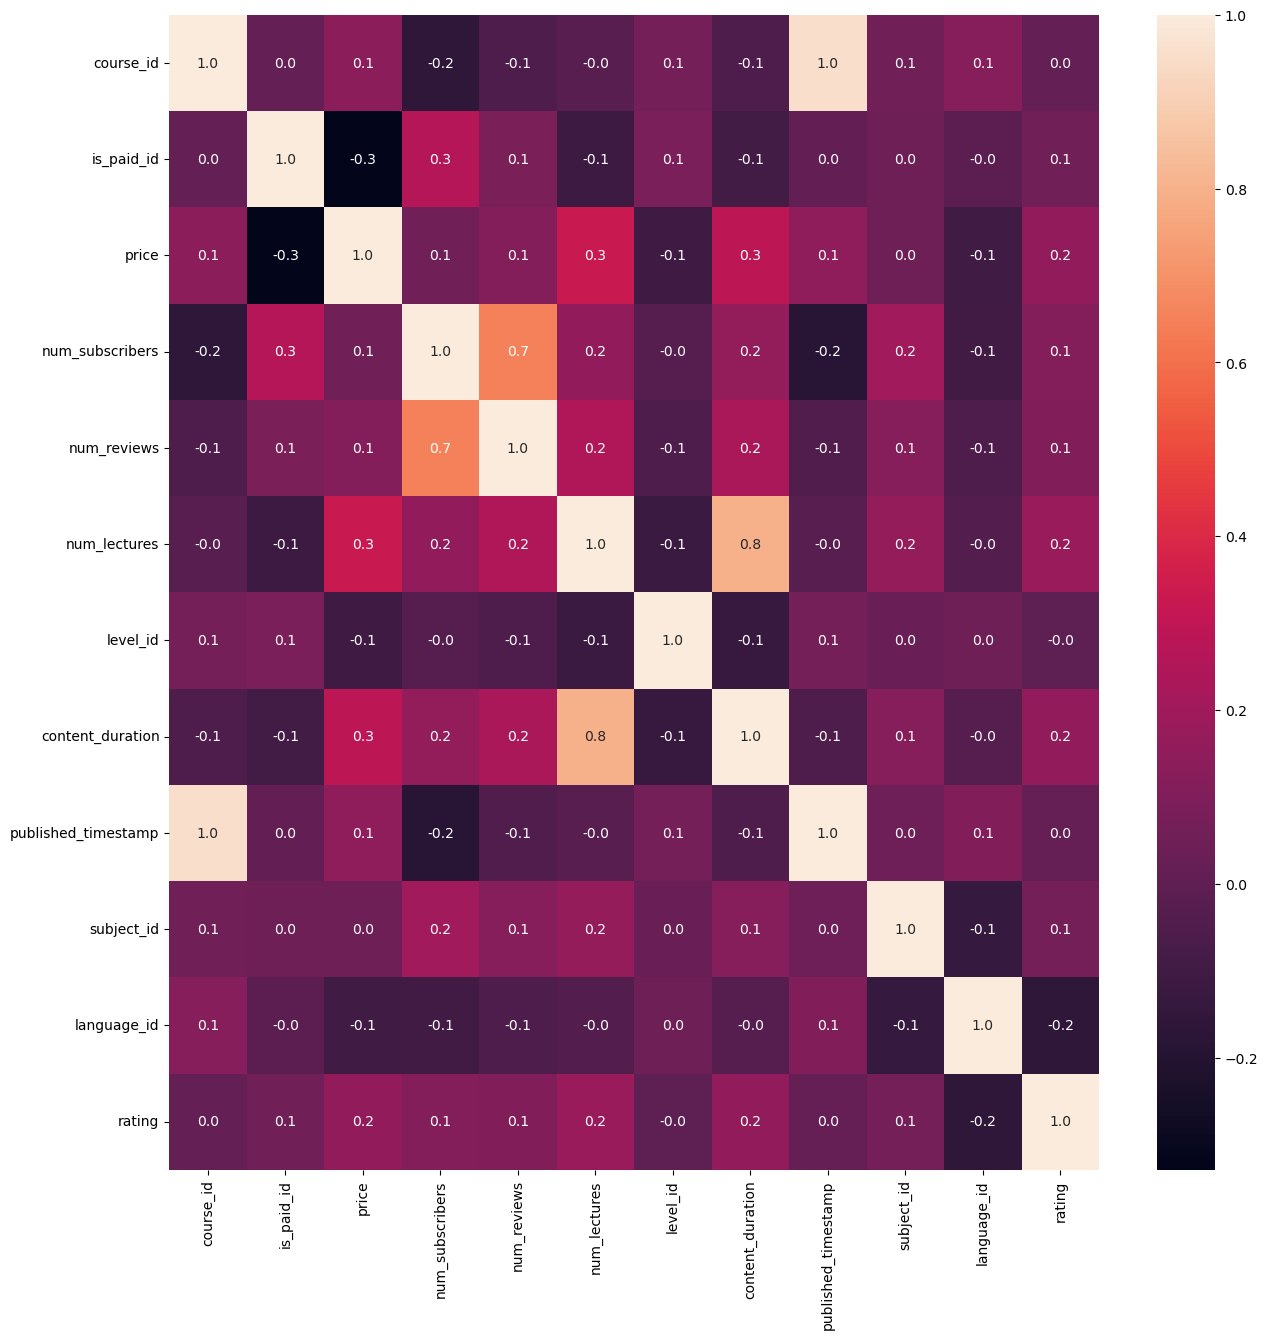

In [228]:
corr = df_aux.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        fmt= '.1f',annot_kws={'size': 10},
        annot=True);